# Installations

In [2]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git             #to install hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-9vfnx715
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-9vfnx715
     |████████████████████████████████| 163kB 6.4MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-cp37-none-any.whl size=27011 sha256=f865bcb69243c5e3c6833042d764dc8ef107d4dad1fce8590018f5503c88d1b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-kx3klf4s/wheels/28/93/20/67dca95c2aaa13466b4900ba79a7bab66022e50ce44f8a438d
Successfully built hpsklearn


In [3]:
!pip install tpot

     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 166.7MB 61kB/s 
     |████████████████████████████████| 163kB 48.9MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=6dca34f5cbea414094d43d27b612f4148a1de8870de8e54f2bcbb4058467a3d0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/ML Tasks/ADG-ML/data.csv')

In [7]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [9]:
#copying the datset values into another variable
df1=df.copy()
df1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Encoding the data

In [11]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()                                     #Encode target labels with value between 0 and n_classes-1
df1['encode_diag']=encode.fit_transform(df['diagnosis'])
df1['diagnosis']=df1['encode_diag']
df1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encode_diag
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


# Getting the useful data

In [12]:
df_clean=df1.drop(['id','Unnamed: 32'],axis='columns')
df_clean.head(5)                                       #Data without all the unwanted variables

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,encode_diag
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Splitting the dependent and independent variables

In [13]:
x=df_clean.iloc[:,1:-1]
x.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
y=df_clean.iloc[:,31]
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: encode_diag, dtype: int64

# Splitting into training and test dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=0)

In [16]:
x_train.count()

radius_mean                421
texture_mean               421
perimeter_mean             421
area_mean                  421
smoothness_mean            421
compactness_mean           421
concavity_mean             421
concave points_mean        421
symmetry_mean              421
fractal_dimension_mean     421
radius_se                  421
texture_se                 421
perimeter_se               421
area_se                    421
smoothness_se              421
compactness_se             421
concavity_se               421
concave points_se          421
symmetry_se                421
fractal_dimension_se       421
radius_worst               421
texture_worst              421
perimeter_worst            421
area_worst                 421
smoothness_worst           421
compactness_worst          421
concavity_worst            421
concave points_worst       421
symmetry_worst             421
fractal_dimension_worst    421
dtype: int64

In [17]:
y_train.count()

421

In [18]:
y_test.count()

148

# Training the RandomForest onto to the dataset

In [19]:
from sklearn.ensemble import RandomForestClassifier     
classifier=RandomForestClassifier(random_state=0)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.972972972972973

In [20]:
y_pred=classifier.predict(x_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.95      0.98      0.96        55

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148



In [22]:
print(confusion_matrix(y_test,y_pred))

[[90  3]
 [ 1 54]]


# Training Logistic regression onto the dataset

In [23]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0,max_iter=171)
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=171,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=regressor.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        93
           1       0.92      0.98      0.95        55

    accuracy                           0.96       148
   macro avg       0.95      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148



In [26]:
print(confusion_matrix(y_test,y_pred))

[[88  5]
 [ 1 54]]


In [27]:
regressor.score(x_test,y_test)

0.9594594594594594

# GridSearchCV RandomForestClassifier

In [28]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100]},cv=5,return_train_score='False')
clf.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [29]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025905,0.010279,0.002123,0.000112,10,{'n_estimators': 10},0.938596,0.947368,0.973684,0.956140,0.973451,0.957848,0.013983,3,0.995604,0.997802,0.997802,0.993407,0.993421,0.995607,0.001963
1,0.099457,0.006682,0.005766,0.000484,50,{'n_estimators': 50},0.938596,0.929825,0.991228,0.973684,0.964602,0.959587,0.022590,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.199436,0.009651,0.009346,0.000269,100,{'n_estimators': 100},0.929825,0.938596,0.982456,0.982456,0.973451,0.961357,0.022579,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [30]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'n_estimators': 10},0.957848
1,{'n_estimators': 50},0.959587
2,{'n_estimators': 100},0.961357


In [31]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
#training again to confirm values
classifier1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
classifier1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred1=classifier1.predict(x_test)

In [34]:
classifier1.score(x_test,y_test)

0.9662162162162162

In [35]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.95      0.96      0.95        55

    accuracy                           0.97       148
   macro avg       0.96      0.97      0.96       148
weighted avg       0.97      0.97      0.97       148



In [36]:
print(confusion_matrix(y_test,y_pred1))

[[90  3]
 [ 2 53]]


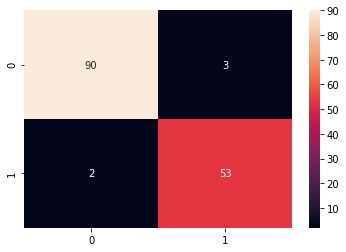

In [37]:
sn.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

# GridSearchCV LogisticRegression

In [38]:
from sklearn.model_selection import GridSearchCV
reg=GridSearchCV(LogisticRegression(),{'C':[1,5,10]},cv=5,return_train_score='False')
reg.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='False',
             scoring=None, verbose=0)

In [39]:
df=pd.DataFrame(reg.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042694,0.002259,0.001592,0.000155,1,{'C': 1},0.929825,0.938596,0.956140,0.947368,0.946903,0.943766,0.008911,2,0.947253,0.940659,0.945055,0.967033,0.947368,0.949474,0.009109
1,0.046725,0.010466,0.001991,0.000456,5,{'C': 5},0.947368,0.938596,0.956140,0.912281,0.964602,0.943798,0.017990,1,0.962637,0.947253,0.947253,0.953846,0.945175,0.951233,0.006407
2,0.044958,0.005220,0.001943,0.000351,10,{'C': 10},0.947368,0.938596,0.947368,0.912281,0.929204,0.934964,0.013181,3,0.964835,0.942857,0.947253,0.953846,0.940789,0.949916,0.008698


In [40]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'C': 1},0.943766
1,{'C': 5},0.943798
2,{'C': 10},0.934964


In [41]:
reg.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
reg1=LogisticRegression(C=5, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
reg1.fit(x_train,y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred2=reg1.predict(x_test)

In [44]:
reg1.score(x_test,y_test)

0.9459459459459459

In [45]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        93
           1       0.90      0.96      0.93        55

    accuracy                           0.95       148
   macro avg       0.94      0.95      0.94       148
weighted avg       0.95      0.95      0.95       148



In [46]:
print(confusion_matrix(y_test,y_pred2))

[[87  6]
 [ 2 53]]


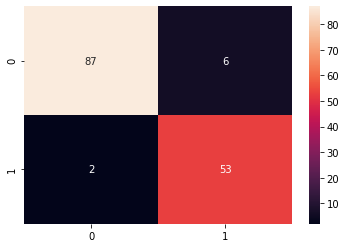

In [47]:
sn.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

# RandomSearchCV RandomForestclassifier

In [48]:
from sklearn.model_selection import RandomizedSearchCV
clf1=RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100]},cv=5,return_train_score='False',n_iter=3)
clf1.fit(x,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
df=pd.DataFrame(clf1.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033304,0.023142,0.002014,0.000103,10,{'n_estimators': 10},0.929825,0.929825,0.947368,0.964912,0.973451,0.949076,0.017827,3,0.997802,0.995604,0.995604,0.997802,0.991228,0.995608,0.002401
1,0.098721,0.007748,0.005268,0.000205,50,{'n_estimators': 50},0.929825,0.947368,0.982456,0.982456,0.973451,0.963111,0.021030,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.192230,0.004350,0.009716,0.001325,100,{'n_estimators': 100},0.929825,0.956140,0.982456,0.964912,0.973451,0.961357,0.018031,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [50]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'n_estimators': 10},0.949076
1,{'n_estimators': 50},0.963111
2,{'n_estimators': 100},0.961357


In [51]:
clf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
clf1.best_score_

0.9631113181183046

In [53]:
#training again to confirm values
classifier2=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    random_state=None,
                                                    verbose=0,
                                                    warm_start=False)
classifier2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_pred3=classifier2.predict(x_test)

In [55]:
classifier2.score(x_test,y_test)

0.9662162162162162

In [56]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.95      0.96      0.95        55

    accuracy                           0.97       148
   macro avg       0.96      0.97      0.96       148
weighted avg       0.97      0.97      0.97       148



In [57]:
print(confusion_matrix(y_test,y_pred3))

[[90  3]
 [ 2 53]]


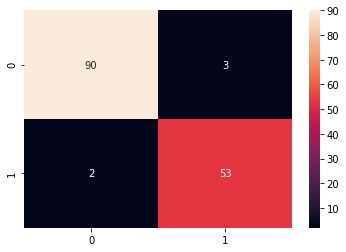

In [58]:
sn.heatmap(confusion_matrix(y_test,y_pred3),annot=True)

# RandomSearchCV LogisticRegression

In [59]:
from sklearn.model_selection import RandomizedSearchCV
reg1=RandomizedSearchCV(LogisticRegression(),{'C':[10,50,100]},cv=5,return_train_score='False',n_iter=3)
reg1.fit(x,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=3, n_jobs=None,
                   param_distributions={'C': [10, 50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score='False', scoring=None, verbose=0)

In [60]:
df=pd.DataFrame(reg1.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041034,0.004520,0.001468,0.000116,10,{'C': 10},0.947368,0.938596,0.947368,0.912281,0.929204,0.934964,0.013181,3,0.964835,0.942857,0.947253,0.953846,0.940789,0.949916,0.008698
1,0.043893,0.008301,0.001569,0.000136,50,{'C': 50},0.938596,0.938596,0.947368,0.921053,0.938053,0.936733,0.008575,2,0.951648,0.949451,0.945055,0.969231,0.942982,0.951673,0.009301
2,0.040978,0.003146,0.001521,0.000108,100,{'C': 100},0.938596,0.938596,0.947368,0.912281,0.964602,0.940289,0.016920,1,0.947253,0.947253,0.945055,0.958242,0.942982,0.948157,0.005287


In [61]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'C': 10},0.934964
1,{'C': 50},0.936733
2,{'C': 100},0.940289


In [62]:
reg1.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
reg1.best_score_

0.9402887750349324

In [64]:
reg2=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False)
reg2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred4=reg2.predict(x_test)

In [66]:
reg2.score(x_test,y_test)

0.9459459459459459

In [67]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        93
           1       0.90      0.96      0.93        55

    accuracy                           0.95       148
   macro avg       0.94      0.95      0.94       148
weighted avg       0.95      0.95      0.95       148



In [68]:
print(confusion_matrix(y_test,y_pred4))

[[87  6]
 [ 2 53]]


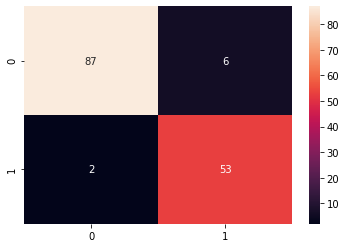

In [69]:
sn.heatmap(confusion_matrix(y_test,y_pred4),annot=True)

# TPOT

In [70]:
from tpot import TPOTClassifier

In [71]:
model=TPOTClassifier(generations=5,population_size=50,cv=5,verbosity=3,random_state=0,scoring='accuracy',periodic_checkpoint_folder='any_string_you_like')
model.fit(x_train,y_train)

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 62.

Generation 1 - Current Pareto front scores:

-1	0.9524

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder='any_string_you_like',
               population_size=50, random_state=0, scoring='accuracy',
               subsample=1.0, template=None, use_dask=False, verbosity=3,
               warm_start=False)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
mod=GradientBoostingClassifier( learning_rate=0.1, max_depth=10, max_features=0.7000000000000001, min_samples_leaf=14, min_samples_split=13, n_estimators=100, subsample=0.35000000000000003)

In [73]:
mod.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=0.7000000000000001, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=13,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.35000000000000003,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
y_pred5=mod.predict(x_test)

In [75]:
mod.score(x_test,y_test)

0.9797297297297297

In [76]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.98      0.96      0.97        55

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



In [77]:
print(confusion_matrix(y_test,y_pred5))

[[92  1]
 [ 2 53]]


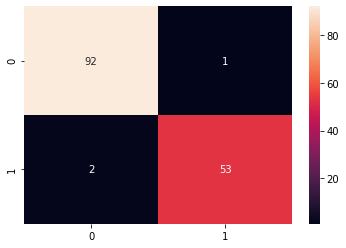

In [78]:
sn.heatmap(confusion_matrix(y_test,y_pred5),annot=True)

# Bayesian Optimization

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(df_clean.drop(['encode_diag'],axis='columns') ,df_clean['encode_diag'],test_size=0.27,random_state=0)

In [92]:
from hpsklearn import HyperoptEstimator,any_classifier,any_preprocessing
from hyperopt import tpe
hpts=HyperoptEstimator(classifier=any_classifier('clf'),preprocessing=any_preprocessing('pre'),algo=tpe.suggest,max_evals=10)

In [93]:
hpts.fit(X_train,Y_train)

100%|██████████| 1/1 [00:04<00:00,  4.14s/it, best loss: 0.0]


In [94]:
hpts.best_model()

{'ex_preprocs': (),
 'learner': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.05198358745604793, loss='deviance',
                            max_depth=None, max_features=0.7289762193644673,
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=2,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=360, n_iter_no_change=None,
                            presort='deprecated', random_state=1, subsample=1.0,
                            tol=0.0001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),)}

In [95]:
gbc=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.014642752253745811, loss='deviance',
                            max_depth=None, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=102, n_iter_no_change=None,
                            presort='deprecated', random_state=3,
                            subsample=0.6217813737448401, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.014642752253745811, loss='deviance',
                           max_depth=None, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=102, n_iter_no_change=None,
                           presort='deprecated', random_state=3,
                           subsample=0.6217813737448401, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
y_pred6=gbc.predict(X_test)

In [97]:
gbc.score(X_test,Y_test)

1.0

In [98]:
print(classification_report(Y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [99]:
print(confusion_matrix(Y_test,y_pred6))

[[99  0]
 [ 0 55]]


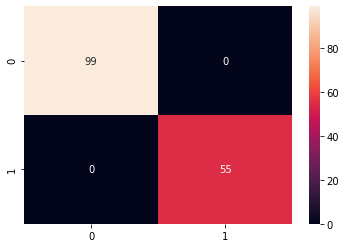

In [100]:
sn.heatmap(confusion_matrix(Y_test,y_pred6),annot=True)